In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

(4000, 5500)

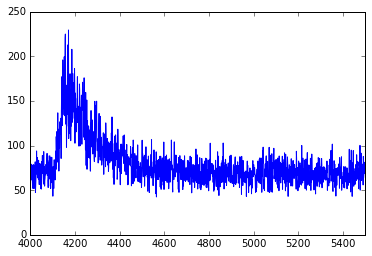

In [3]:
"""  Load Brightest Pulse """
p1 = np.load('ts2014-06-13T07:00:02.13597.npy')

data = p1.reshape(-1,4,6)
data = np.fft.rfft(data,axis=1)
plt.plot(abs(data).sum(1).sum(-1))
plt.xlim(4000,5500)

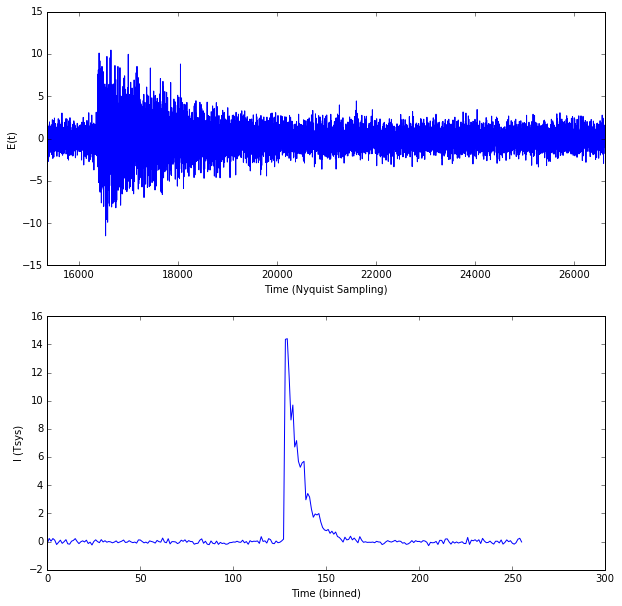

In [20]:
""" Generate a delta function pulse convolved with an impulse response and 
with added gaussian noise

The impulse response is an exponential decay with intrinsic noise 
(variance of the envelope is proportional to the amplitude)
and with random phases.
"""

# Sim pars
length = 2**15
efold = float(2**10)
SN = 4
noise = 1
binf = int(efold//8)

t = np.arange(length)

g = ( np.exp(-t / efold) + 0j )[:length//2]
g *=  ( np.random.normal(size=g.shape) + 1j*np.random.normal(size=g.shape) )
g *= np.exp(2j*np.pi*np.random.random(length//2))

irf = np.fft.fft(g)
irf = np.lib.pad(irf, (0,1), 'constant', constant_values=(0+0j))

ts = np.zeros(length)
ts[length//2] += 1

ts_convolved = np.fft.irfft( (np.fft.rfft(ts) * irf) )
p_irf = SN*ts_convolved + noise*np.random.normal(size=length)

plt.figure(figsize=(10,10))

plt.subplot(211)

plt.plot(p_irf)
plt.ylim(-15, 15)
plt.xlim(length//2-efold, length//2+efold*10)

plt.xlabel('Time (Nyquist Sampling)')
plt.ylabel('E(t)')

plt.subplot(212)

# Form intensities and bin in time
I = (np.abs(p_irf)**2.0).reshape(-1, binf).mean(-1)
Ibg = I / np.mean(I[:len(I)//4]) - 1

plt.plot(Ibg)
plt.xlabel('Time (binned)')
plt.ylabel('I (Tsys)')